<a href="https://colab.research.google.com/github/vsangireddy27/MachineLearningProjects/blob/main/minglang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("NSL_regular_season_data_2.csv")
df

,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP
0,game_2023_94,TUC,ALB,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53
1,game_2023_341,MOB,ALB,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56
2,game_2023_442,CHM,ALB,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52
3,game_2023_50,SAS,ALB,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49
4,game_2023_389,FOR,ALB,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,game_2023_81,TUC,WIC,2,1,2.72,0.38,16,8,8,2,0,0,0,0,0.33
472,game_2023_36,DOV,WIC,0,2,1.11,1.34,9,13,7,4,0,0,0,0,0.31
473,game_2023_269,SFS,WIC,1,1,2.84,0.30,26,2,8,6,0,0,0,0,0.54
474,game_2023_298,ALB,WIC,2,3,2.61,2.09,12,17,7,4,0,0,0,0,0.43


In [ ]:
df_test = pd.read_csv("NSL_Group_Round_Games.csv")
df_test

,game_id,HomeTeam,AwayTeam
0,Group1_Game1,ANC,LEX
1,Group1_Game2,DOV,TAC
2,Group1_Game3,TAC,ANC
3,Group1_Game4,DOV,LEX
4,Group1_Game5,ANC,DOV
5,Group1_Game6,LEX,TAC
6,Group2_Game1,FAR,TOL
7,Group2_Game2,SPR,TUC
8,Group2_Game3,TUC,FAR
9,Group2_Game4,SPR,TOL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        476 non-null    object 
 1   HomeTeam       476 non-null    object 
 2   AwayTeam       476 non-null    object 
 3   HomeScore      476 non-null    int64  
 4   AwayScore      476 non-null    int64  
 5   Home_xG        476 non-null    float64
 6   Away_xG        476 non-null    float64
 7   Home_shots     476 non-null    int64  
 8   Away_shots     476 non-null    int64  
 9   Home_corner    476 non-null    int64  
 10  Away_corner    476 non-null    int64  
 11  Home_PK_Goal   476 non-null    int64  
 12  Away_PK_Goal   476 non-null    int64  
 13  Home_PK_shots  476 non-null    int64  
 14  Away_PK_shots  476 non-null    int64  
 15  Home_ToP       476 non-null    float64
dtypes: float64(3), int64(10), object(3)
memory usage: 59.6+ KB


<ipython-input-26-3d3aa29510a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

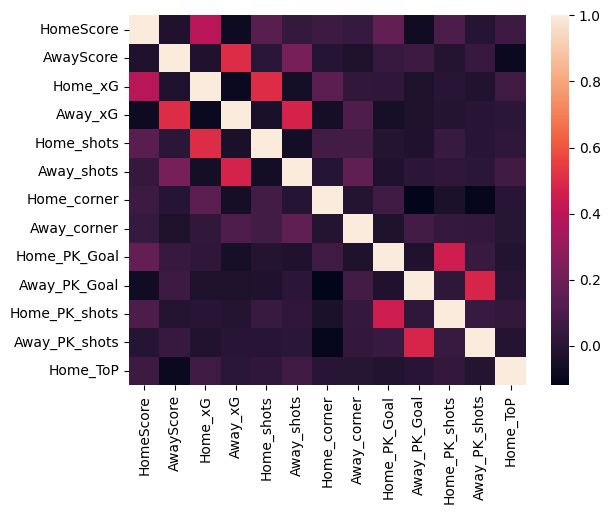

In [ ]:
df_no_num = df.drop(['game_id', 'HomeTeam', 'AwayTeam'], axis=1)
sns.heatmap(df.corr())

In [ ]:
# need to turn the home team and away team into quantifiable predictors
# can have each team be an index
# target can be home score / away score ratio
# predict that ratio based on home team idx, away team idx, and the other features

In [ ]:
df['id'] = np.arange(0, len(df))
df

,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,id
0,game_2023_94,TUC,ALB,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53,0
1,game_2023_341,MOB,ALB,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56,1
2,game_2023_442,CHM,ALB,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52,2
3,game_2023_50,SAS,ALB,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49,3
4,game_2023_389,FOR,ALB,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,game_2023_81,TUC,WIC,2,1,2.72,0.38,16,8,8,2,0,0,0,0,0.33,471
472,game_2023_36,DOV,WIC,0,2,1.11,1.34,9,13,7,4,0,0,0,0,0.31,472
473,game_2023_269,SFS,WIC,1,1,2.84,0.30,26,2,8,6,0,0,0,0,0.54,473
474,game_2023_298,ALB,WIC,2,3,2.61,2.09,12,17,7,4,0,0,0,0,0.43,474


In [ ]:
teams_dict = dict(zip(df['HomeTeam'].unique(), df['id']))
teams_dict

{'TUC': 0,
 'MOB': 1,
 'CHM': 2,
 'SAS': 3,
 'FOR': 4,
 'FAR': 5,
 'PRO': 6,
 'TAC': 7,
 'REN': 8,
 'BOI': 9,
 'WIC': 10,
 'OAK': 11,
 'BAK': 12,
 'SFS': 13,
 'SPR': 14,
 'ANC': 15,
 'EUG': 16,
 'AUG': 17,
 'SJU': 18,
 'DOV': 19,
 'ALB': 20,
 'LEX': 21,
 'LAR': 22,
 'LRO': 23,
 'MAN': 24,
 'TOL': 25,
 'JAC': 26,
 'DES': 27}

In [1]:
def convert_team_to_id(df):
  l = []
  l2 = []
  for x, y in zip(df['HomeTeam'], df['AwayTeam']):
    l.append(teams_dict[x])
    l2.append(teams_dict[y])

  df['HomeTeam'] = pd.Series(l)
  df['AwayTeam'] = pd.Series(l2)

In [ ]:
convert_team_to_id(df)
df

,game_id,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,id
0,game_2023_94,0,20,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53,0
1,game_2023_341,1,20,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56,1
2,game_2023_442,2,20,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52,2
3,game_2023_50,3,20,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49,3
4,game_2023_389,4,20,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,game_2023_81,0,10,2,1,2.72,0.38,16,8,8,2,0,0,0,0,0.33,471
472,game_2023_36,19,10,0,2,1.11,1.34,9,13,7,4,0,0,0,0,0.31,472
473,game_2023_269,13,10,1,1,2.84,0.30,26,2,8,6,0,0,0,0,0.54,473
474,game_2023_298,20,10,2,3,2.61,2.09,12,17,7,4,0,0,0,0,0.43,474


In [ ]:
df = df.drop('game_id', axis=1)
df

,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,id
0,0,20,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53,0
1,1,20,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56,1
2,2,20,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52,2
3,3,20,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49,3
4,4,20,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0,10,2,1,2.72,0.38,16,8,8,2,0,0,0,0,0.33,471
472,19,10,0,2,1.11,1.34,9,13,7,4,0,0,0,0,0.31,472
473,13,10,1,1,2.84,0.30,26,2,8,6,0,0,0,0,0.54,473
474,20,10,2,3,2.61,2.09,12,17,7,4,0,0,0,0,0.43,474


In [ ]:
df['Home_Cr'] = df['HomeScore'].div(df['Home_xG'])
df['Away_Cr'] = df['AwayScore'].div(df['Away_xG'])
df

,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,id,Home_Cr,Away_Cr
0,0,20,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53,0,0.396825,1.500000
1,1,20,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56,1,6.521739,1.010101
2,2,20,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52,2,0.000000,0.862069
3,3,20,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49,3,1.307190,1.818182
4,4,20,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71,4,0.000000,1.769912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0,10,2,1,2.72,0.38,16,8,8,2,0,0,0,0,0.33,471,0.735294,2.631579
472,19,10,0,2,1.11,1.34,9,13,7,4,0,0,0,0,0.31,472,0.000000,1.492537
473,13,10,1,1,2.84,0.30,26,2,8,6,0,0,0,0,0.54,473,0.352113,3.333333
474,20,10,2,3,2.61,2.09,12,17,7,4,0,0,0,0,0.43,474,0.766284,1.435407


In [ ]:
# was playing around with ratio idea here
# could work but will have to come up with some arbitrary
# value to use when awayscore is 0
# df['ScoreRatio'] = df['HomeScore'].div(df['AwayScore'])
# for x in range(len(df['HomeScore'])):
#   if np.isnan(df['HomeScore'].iloc[x] / df['AwayScore'].iloc[x]):
#     df['ScoreRatio'].iloc[x] = 2
# df.loc[np.isnan(df['ScoreRatio'])] = 2

#df['Winner'] = np.where(df['HomeScore'] >= df['AwayScore'], 0, 1)
df['GD'] = df['HomeScore'].sub(df['AwayScore'])
# note: at the end, we'll have to do some processing
# positive GD means home team won -> 'HOME' or vice versa (can borrow above code)
df

# target - home/away ratio OR winner (home or away)
# home team idx, away team idx
# avgs for home team idx
# avgs for away team idx

,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,id,Home_Cr,Away_Cr,GD
0,0,20,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53,0,0.396825,1.500000,-2
1,1,20,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56,1,6.521739,1.010101,2
2,2,20,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52,2,0.000000,0.862069,-1
3,3,20,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49,3,1.307190,1.818182,1
4,4,20,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71,4,0.000000,1.769912,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0,10,2,1,2.72,0.38,16,8,8,2,0,0,0,0,0.33,471,0.735294,2.631579,1
472,19,10,0,2,1.11,1.34,9,13,7,4,0,0,0,0,0.31,472,0.000000,1.492537,-2
473,13,10,1,1,2.84,0.30,26,2,8,6,0,0,0,0,0.54,473,0.352113,3.333333,0
474,20,10,2,3,2.61,2.09,12,17,7,4,0,0,0,0,0.43,474,0.766284,1.435407,-1


In [ ]:
# df = df.drop('Winner', axis=1)
# df

In [ ]:
df['AwayTeam'].unique()

array([20, 15, 17, 12,  9,  2, 27, 19, 16,  5,  4, 26, 22, 21, 23, 24,  1,
       11,  6,  8,  3, 13, 18, 14,  7, 25,  0, 10])

In [ ]:
df2 = pd.DataFrame()

In [ ]:
df

,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,id,Home_Cr,Away_Cr,GD
0,0,20,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53,0,0.396825,1.500000,-2
1,1,20,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56,1,6.521739,1.010101,2
2,2,20,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52,2,0.000000,0.862069,-1
3,3,20,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49,3,1.307190,1.818182,1
4,4,20,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71,4,0.000000,1.769912,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0,10,2,1,2.72,0.38,16,8,8,2,0,0,0,0,0.33,471,0.735294,2.631579,1
472,19,10,0,2,1.11,1.34,9,13,7,4,0,0,0,0,0.31,472,0.000000,1.492537,-2
473,13,10,1,1,2.84,0.30,26,2,8,6,0,0,0,0,0.54,473,0.352113,3.333333,0
474,20,10,2,3,2.61,2.09,12,17,7,4,0,0,0,0,0.43,474,0.766284,1.435407,-1


In [ ]:
df['Away_ToP'] = 1-df['Home_ToP']

In [ ]:
for team in df['AwayTeam'].unique():
    teamrows = df[df['AwayTeam'] == team]
    avgscore = teamrows['AwayScore'].mean()
    avgxG = teamrows['Away_xG'].mean()
    avgshots = teamrows['Away_shots'].mean()
    avgcorner = teamrows['Away_corner'].mean()
    avgpkgoal = teamrows['Away_PK_Goal'].mean()
    avgpkshots = teamrows['Away_PK_shots'].mean()
    avgconvrate = teamrows['Away_Cr'].mean()
    avgposs = teamrows['Away_ToP'].mean()
    df2.loc[team, 'teamid'] = int(team)
    df2.loc[team, 'avgscore'] = avgscore
    df2.loc[team, 'avgxG'] = avgxG
    df2.loc[team, 'avgshots'] = avgshots
    df2.loc[team, 'avgcorner'] = avgcorner
    df2.loc[team, 'avgPKGoal'] = avgpkgoal
    df2.loc[team, 'avgPKShots'] = avgpkshots
    df2.loc[team, 'avgConversionRate'] = avgconvrate
    df2.loc[team, 'avgposs'] = avgposs

In [ ]:
df3 = pd.DataFrame()

In [ ]:
for team in df['HomeTeam'].unique():
    teamrows = df[df['HomeTeam'] == team]
    avgscore = teamrows['HomeScore'].mean()
    avgxG = teamrows['Home_xG'].mean()
    avgshots = teamrows['Home_shots'].mean()
    avgcorner = teamrows['Home_corner'].mean()
    avgpkgoal = teamrows['Home_PK_Goal'].mean()
    avgpkshots = teamrows['Home_PK_shots'].mean()
    avgconvrate = teamrows['Home_Cr'].mean()
    avgposs = teamrows['Home_ToP'].mean()
    df3.loc[team, 'teamid'] = int(team)
    df3.loc[team, 'avgscore'] = avgscore
    df3.loc[team, 'avgxG'] = avgxG
    df3.loc[team, 'avgshots'] = avgshots
    df3.loc[team, 'avgcorner'] = avgcorner
    df3.loc[team, 'avgPKGoal'] = avgpkgoal
    df3.loc[team, 'avgPKShots'] = avgpkshots
    df3.loc[team, 'avgConversionRate'] = avgconvrate
    df3.loc[team, 'avgposs'] = avgposs

In [ ]:
# df2 = (df2+df3)/2

In [ ]:
df2

,teamid,avgscore,avgxG,avgshots,avgcorner,avgPKGoal,avgPKShots,avgConversionRate,avgposs
20,20.0,1.764706,1.283529,12.882353,4.352941,0.000000,0.000000,1.434018,0.456471
15,15.0,2.117647,1.014118,12.000000,3.882353,0.000000,0.058824,1.714247,0.485882
17,17.0,1.529412,1.084706,11.705882,4.470588,0.058824,0.294118,1.594403,0.530588
12,12.0,1.352941,0.921176,10.176471,4.411765,0.000000,0.117647,1.273444,0.440000
9,9.0,1.823529,1.125294,12.000000,3.470588,0.000000,0.176471,1.483864,0.451176
2,2.0,1.470588,0.911176,10.764706,4.882353,0.058824,0.176471,1.828944,0.503529
27,27.0,1.647059,1.056471,11.352941,4.117647,0.058824,0.176471,2.015542,0.511765
19,19.0,1.705882,1.110588,13.470588,4.117647,0.058824,0.117647,2.314230,0.424706
16,16.0,1.470588,0.872353,10.000000,4.294118,0.000000,0.058824,1.961699,0.425294
5,5.0,1.941176,1.147059,11.470588,3.588235,0.058824,0.117647,1.715091,0.485882


In [ ]:
df3

,teamid,avgscore,avgxG,avgshots,avgcorner,avgPKGoal,avgPKShots,avgConversionRate,avgposs
0,0.0,1.705882,1.681765,13.823529,5.117647,0.058824,0.235294,1.055936,0.498824
1,1.0,1.058824,1.340000,11.882353,4.058824,0.058824,0.352941,1.132036,0.521176
2,2.0,0.882353,1.485882,16.529412,4.882353,0.000000,0.352941,0.539150,0.537059
3,3.0,1.352941,1.500000,15.647059,5.588235,0.058824,0.294118,0.959991,0.509412
4,4.0,1.764706,1.920000,14.529412,5.529412,0.000000,0.058824,1.266889,0.585294
5,5.0,2.058824,2.027647,14.764706,7.294118,0.000000,0.176471,1.043333,0.550000
6,6.0,2.000000,1.495882,16.000000,4.235294,0.058824,0.294118,1.701004,0.478824
7,7.0,1.705882,1.447647,15.470588,5.176471,0.058824,0.176471,1.503691,0.525882
8,8.0,1.352941,1.513529,15.411765,5.705882,0.058824,0.411765,0.901627,0.551765
9,9.0,1.235294,1.854118,16.705882,6.352941,0.058824,0.294118,0.836809,0.505294


In [ ]:
df

,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,Home_PK_Goal,Away_PK_Goal,Home_PK_shots,Away_PK_shots,Home_ToP,id,Home_Cr,Away_Cr,GD,Away_ToP
0,0,20,1,3,2.52,2.00,13,15,3,4,0,0,1,0,0.53,0,0.396825,1.500000,-2,0.47
1,1,20,3,1,0.46,0.99,11,8,3,6,0,0,0,0,0.56,1,6.521739,1.010101,2,0.44
2,2,20,0,1,1.62,1.16,16,13,1,7,0,0,0,0,0.52,2,0.000000,0.862069,-1,0.48
3,3,20,2,1,1.53,0.55,20,2,6,1,0,0,0,0,0.49,3,1.307190,1.818182,1,0.51
4,4,20,0,2,2.15,1.13,18,13,2,0,0,0,0,0,0.71,4,0.000000,1.769912,-2,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0,10,2,1,2.72,0.38,16,8,8,2,0,0,0,0,0.33,471,0.735294,2.631579,1,0.67
472,19,10,0,2,1.11,1.34,9,13,7,4,0,0,0,0,0.31,472,0.000000,1.492537,-2,0.69
473,13,10,1,1,2.84,0.30,26,2,8,6,0,0,0,0,0.54,473,0.352113,3.333333,0,0.46
474,20,10,2,3,2.61,2.09,12,17,7,4,0,0,0,0,0.43,474,0.766284,1.435407,-1,0.57


In [ ]:
# for each row
# get home team idx -> add avg columns for that idx
# get away team idx -> add avg columns for that idx
# remove in game stats so it's just avgs

In [ ]:
df.iloc[0]['HomeTeam']

0.0

In [ ]:
len(df)

476

In [ ]:
df2.columns

Index(['teamid', 'avgscore', 'avgxG', 'avgshots', 'avgcorner', 'avgPKGoal',
       'avgPKShots', 'avgConversionRate', 'avgposs'],
      dtype='object')

In [ ]:
int(df.iloc[0]['HomeTeam'])

0

In [ ]:
df2.iloc[0]['avgscore']

1.7647058823529411

In [ ]:
def add_avgs(df):
  for col in df2.columns:
    df['home_' + col] = 0.0
    df['away_' + col] = 0.0

  for i in range(len(df)):
    home_idx = int(df.iloc[i]['HomeTeam'])
    away_idx = int(df.iloc[i]['AwayTeam'])
    for col in df2.columns:
      df['home_' + col].iloc[i] = df3.at[home_idx, col]
      df['away_' + col].iloc[i] = df2.at[away_idx, col]

In [ ]:
add_avgs(df)
df

<ipython-input-53-4a7688e0ed17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_' + col].iloc[i] = df3.at[home_idx, col]
<ipython-input-53-4a7688e0ed17>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['away_' + col].iloc[i] = df2.at[away_idx, col]


,HomeTeam,AwayTeam,HomeScore,AwayScore,Home_xG,Away_xG,Home_shots,Away_shots,Home_corner,Away_corner,...,home_avgcorner,away_avgcorner,home_avgPKGoal,away_avgPKGoal,home_avgPKShots,away_avgPKShots,home_avgConversionRate,away_avgConversionRate,home_avgposs,away_avgposs
0,0,20,1,3,2.52,2.00,13,15,3,4,...,5.117647,4.352941,0.058824,0.0,0.235294,0.000000,1.055936,1.434018,0.498824,0.456471
1,1,20,3,1,0.46,0.99,11,8,3,6,...,4.058824,4.352941,0.058824,0.0,0.352941,0.000000,1.132036,1.434018,0.521176,0.456471
2,2,20,0,1,1.62,1.16,16,13,1,7,...,4.882353,4.352941,0.000000,0.0,0.352941,0.000000,0.539150,1.434018,0.537059,0.456471
3,3,20,2,1,1.53,0.55,20,2,6,1,...,5.588235,4.352941,0.058824,0.0,0.294118,0.000000,0.959991,1.434018,0.509412,0.456471
4,4,20,0,2,2.15,1.13,18,13,2,0,...,5.529412,4.352941,0.000000,0.0,0.058824,0.000000,1.266889,1.434018,0.585294,0.456471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0,10,2,1,2.72,0.38,16,8,8,2,...,5.117647,4.647059,0.058824,0.0,0.235294,0.058824,1.055936,1.353284,0.498824,0.552941
472,19,10,0,2,1.11,1.34,9,13,7,4,...,5.058824,4.647059,0.000000,0.0,0.235294,0.058824,1.028606,1.353284,0.469412,0.552941
473,13,10,1,1,2.84,0.30,26,2,8,6,...,4.823529,4.647059,0.058824,0.0,0.294118,0.058824,0.905231,1.353284,0.552353,0.552941
474,20,10,2,3,2.61,2.09,12,17,7,4,...,5.470588,4.647059,0.000000,0.0,0.235294,0.058824,1.713903,1.353284,0.497647,0.552941


In [ ]:
convert_team_to_id(df_test)
add_avgs(df_test)
df_test

<ipython-input-53-4a7688e0ed17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_' + col].iloc[i] = df3.at[home_idx, col]
<ipython-input-53-4a7688e0ed17>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['away_' + col].iloc[i] = df2.at[away_idx, col]


,game_id,HomeTeam,AwayTeam,home_teamid,away_teamid,home_avgscore,away_avgscore,home_avgxG,away_avgxG,home_avgshots,...,home_avgcorner,away_avgcorner,home_avgPKGoal,away_avgPKGoal,home_avgPKShots,away_avgPKShots,home_avgConversionRate,away_avgConversionRate,home_avgposs,away_avgposs
0,Group1_Game1,15,21,15.0,21.0,1.411765,1.352941,2.084118,1.075294,17.882353,...,5.352941,4.294118,0.000000,0.000000,0.235294,0.058824,0.690020,1.323575,0.480000,0.433529
1,Group1_Game2,19,7,19.0,7.0,1.941176,1.235294,1.835294,0.737647,17.058824,...,5.058824,4.411765,0.000000,0.000000,0.235294,0.176471,1.028606,2.382262,0.469412,0.471176
2,Group1_Game3,7,15,7.0,15.0,1.705882,2.117647,1.447647,1.014118,15.470588,...,5.176471,3.882353,0.058824,0.000000,0.176471,0.058824,1.503691,1.714247,0.525882,0.485882
3,Group1_Game4,19,21,19.0,21.0,1.941176,1.352941,1.835294,1.075294,17.058824,...,5.058824,4.294118,0.000000,0.000000,0.235294,0.058824,1.028606,1.323575,0.469412,0.433529
4,Group1_Game5,15,19,15.0,19.0,1.411765,1.705882,2.084118,1.110588,17.882353,...,5.352941,4.117647,0.000000,0.058824,0.235294,0.117647,0.690020,2.314230,0.480000,0.424706
5,Group1_Game6,21,7,21.0,7.0,1.647059,1.235294,1.578235,0.737647,16.411765,...,5.941176,4.411765,0.000000,0.000000,0.235294,0.176471,1.613434,2.382262,0.478235,0.471176
6,Group2_Game1,5,25,5.0,25.0,2.058824,1.294118,2.027647,0.973529,14.764706,...,7.294118,4.764706,0.000000,0.000000,0.176471,0.117647,1.043333,1.958496,0.550000,0.461176
7,Group2_Game2,14,0,14.0,0.0,2.294118,1.176471,1.267059,0.747647,14.117647,...,4.941176,5.117647,0.058824,0.117647,0.294118,0.117647,2.370627,1.884632,0.467059,0.477647
8,Group2_Game3,0,5,0.0,5.0,1.705882,1.941176,1.681765,1.147059,13.823529,...,5.117647,3.588235,0.058824,0.058824,0.235294,0.117647,1.055936,1.715091,0.498824,0.485882
9,Group2_Game4,14,25,14.0,25.0,2.294118,1.294118,1.267059,0.973529,14.117647,...,4.941176,4.764706,0.058824,0.000000,0.294118,0.117647,2.370627,1.958496,0.467059,0.461176


In [ ]:
df_test.to_csv("test_data_prepped_for_model.csv")

<Axes: >

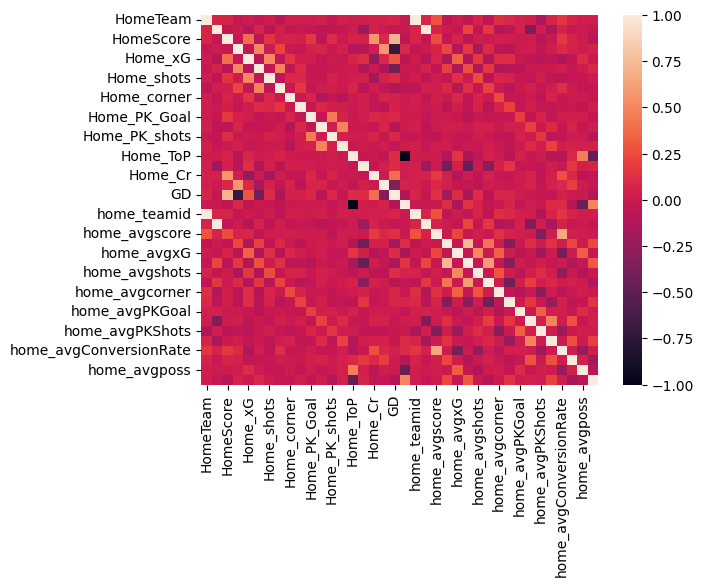

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df = df.drop(['HomeScore', 'AwayScore'], axis=1)

In [ ]:
# would probably improve if we combined home team / away team into a single 'matchup'
# feature - not sure how to do this well

In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df = df.drop(['Home_xG',	'Away_xG',	'Home_shots',	'Away_shots',	'Home_corner',	'Away_corner',	'Home_PK_Goal',	'Away_PK_Goal',	'Home_PK_shots',	'Away_PK_shots',	'Home_ToP'], axis=1)

In [ ]:
df = df.drop(['Home_Cr', 'Away_Cr', 'Away_ToP'], axis=1)

In [ ]:
# for idx in range(len(df)):
#   if df.iloc[idx]['Winner'] == 'AWAY':
#     df.iloc[idx]['Winner'] = 1
#   else:
#     df.iloc[idx]['Winner'] = 0


In [ ]:
# log reg to predict home or away
# could also do lin reg here to predict score ratio
df

,HomeTeam,AwayTeam,GD,home_teamid,away_teamid,home_avgscore,away_avgscore,home_avgxG,away_avgxG,home_avgshots,...,home_avgcorner,away_avgcorner,home_avgPKGoal,away_avgPKGoal,home_avgPKShots,away_avgPKShots,home_avgConversionRate,away_avgConversionRate,home_avgposs,away_avgposs
0,0,20,-2,0.0,20.0,1.705882,1.764706,1.681765,1.283529,13.823529,...,5.117647,4.352941,0.058824,0.0,0.235294,0.000000,1.055936,1.434018,0.498824,0.456471
1,1,20,2,1.0,20.0,1.058824,1.764706,1.340000,1.283529,11.882353,...,4.058824,4.352941,0.058824,0.0,0.352941,0.000000,1.132036,1.434018,0.521176,0.456471
2,2,20,-1,2.0,20.0,0.882353,1.764706,1.485882,1.283529,16.529412,...,4.882353,4.352941,0.000000,0.0,0.352941,0.000000,0.539150,1.434018,0.537059,0.456471
3,3,20,1,3.0,20.0,1.352941,1.764706,1.500000,1.283529,15.647059,...,5.588235,4.352941,0.058824,0.0,0.294118,0.000000,0.959991,1.434018,0.509412,0.456471
4,4,20,-2,4.0,20.0,1.764706,1.764706,1.920000,1.283529,14.529412,...,5.529412,4.352941,0.000000,0.0,0.058824,0.000000,1.266889,1.434018,0.585294,0.456471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0,10,1,0.0,10.0,1.705882,1.294118,1.681765,0.968235,13.823529,...,5.117647,4.647059,0.058824,0.0,0.235294,0.058824,1.055936,1.353284,0.498824,0.552941
472,19,10,-2,19.0,10.0,1.941176,1.294118,1.835294,0.968235,17.058824,...,5.058824,4.647059,0.000000,0.0,0.235294,0.058824,1.028606,1.353284,0.469412,0.552941
473,13,10,0,13.0,10.0,1.647059,1.294118,1.826471,0.968235,14.823529,...,4.823529,4.647059,0.058824,0.0,0.294118,0.058824,0.905231,1.353284,0.552353,0.552941
474,20,10,-1,20.0,10.0,1.470588,1.294118,1.225882,0.968235,12.352941,...,5.470588,4.647059,0.000000,0.0,0.235294,0.058824,1.713903,1.353284,0.497647,0.552941


training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.drop('GD', axis=1)
y = df['GD']
X

,HomeTeam,AwayTeam,home_teamid,away_teamid,home_avgscore,away_avgscore,home_avgxG,away_avgxG,home_avgshots,away_avgshots,home_avgcorner,away_avgcorner,home_avgPKGoal,away_avgPKGoal,home_avgPKShots,away_avgPKShots,home_avgConversionRate,away_avgConversionRate,home_avgposs,away_avgposs
0,0,20,0.0,20.0,1.705882,1.764706,1.681765,1.283529,13.823529,12.882353,5.117647,4.352941,0.058824,0.0,0.235294,0.000000,1.055936,1.434018,0.498824,0.456471
1,1,20,1.0,20.0,1.058824,1.764706,1.340000,1.283529,11.882353,12.882353,4.058824,4.352941,0.058824,0.0,0.352941,0.000000,1.132036,1.434018,0.521176,0.456471
2,2,20,2.0,20.0,0.882353,1.764706,1.485882,1.283529,16.529412,12.882353,4.882353,4.352941,0.000000,0.0,0.352941,0.000000,0.539150,1.434018,0.537059,0.456471
3,3,20,3.0,20.0,1.352941,1.764706,1.500000,1.283529,15.647059,12.882353,5.588235,4.352941,0.058824,0.0,0.294118,0.000000,0.959991,1.434018,0.509412,0.456471
4,4,20,4.0,20.0,1.764706,1.764706,1.920000,1.283529,14.529412,12.882353,5.529412,4.352941,0.000000,0.0,0.058824,0.000000,1.266889,1.434018,0.585294,0.456471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0,10,0.0,10.0,1.705882,1.294118,1.681765,0.968235,13.823529,11.117647,5.117647,4.647059,0.058824,0.0,0.235294,0.058824,1.055936,1.353284,0.498824,0.552941
472,19,10,19.0,10.0,1.941176,1.294118,1.835294,0.968235,17.058824,11.117647,5.058824,4.647059,0.000000,0.0,0.235294,0.058824,1.028606,1.353284,0.469412,0.552941
473,13,10,13.0,10.0,1.647059,1.294118,1.826471,0.968235,14.823529,11.117647,4.823529,4.647059,0.058824,0.0,0.294118,0.058824,0.905231,1.353284,0.552353,0.552941
474,20,10,20.0,10.0,1.470588,1.294118,1.225882,0.968235,12.352941,11.117647,5.470588,4.647059,0.000000,0.0,0.235294,0.058824,1.713903,1.353284,0.497647,0.552941


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
lrm = LogisticRegression(max_iter=3000, random_state=101)
lrm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000, random_state=101)

In [ ]:
from xgboost import XGBClassifier
xg_mdl = XGBClassifier(seed=101)
xg_mdl.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred_xg = xg_mdl.predict(X_test)

In [ ]:
pred = lrm.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rates = []

for k in range(1, 20): # from 1 to arbitrary value close to the number of entries for the smallest category (in this case 48 for category 2)
  mdl = KNeighborsClassifier(n_neighbors=k)
  mdl.fit(X_train, y_train)
  predictions_k = mdl.predict(X_test)
  error_rates.append(np.mean(predictions_k != y_test))

Text(0, 0.5, 'error rate')

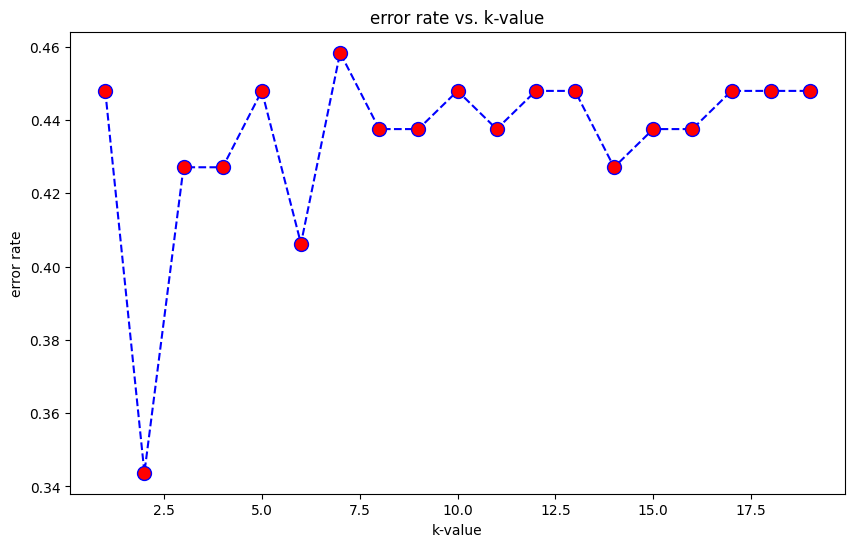

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('error rate vs. k-value')
plt.xlabel('k-value')
plt.ylabel('error rate')

In [ ]:
mdl = KNeighborsClassifier(n_neighbors=3, p=2)
mdl.fit(X_train, y_train)
pred_knn = mdl.predict(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, min_samples_split=5)
pred_rf = rf.fit(X_train, y_train).predict(X_test)

metrics

In [ ]:
accuracy_score(y_test, pred_gnb)

0.5756302521008403

In [ ]:
accuracy_score(y_test, pred_rf)

0.14583333333333334

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, pred)

0.15625

In [ ]:
pred_xg

NameError: name 'pred_xg' is not defined

In [ ]:
accuracy_score(y_test, pred_xg)

0.59375

In [ ]:
accuracy_score(y_test, pred_knn)

0.5729166666666666

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73        56
           1       0.60      0.23      0.33        40

    accuracy                           0.61        96
   macro avg       0.61      0.56      0.53        96
weighted avg       0.61      0.61      0.56        96



reminder to do hyperparam tuning when we pick model w more params